<a href="https://colab.research.google.com/github/Chetan-Sagathiya/Movie-Recommendation-System/blob/master/movie_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np

In [42]:
movies.to_csv("/content/drive/MyDrive/ml_datasets/movie-recommendation-system/movies.csv")

In [43]:
movies = pd.read_csv("/content/drive/MyDrive/ml_datasets/movie-recommendation-system/movies.csv")
movies.head(2)

,Unnamed: 0,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year
0,0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,15
1,1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,15


In [11]:
movies.shape

(10866, 21)

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [13]:
def get_year(release_date):
  release_date = release_date.split('/')
  return release_date[2]

In [14]:
movies['year'] = movies['release_date'].apply(lambda x: get_year(x))

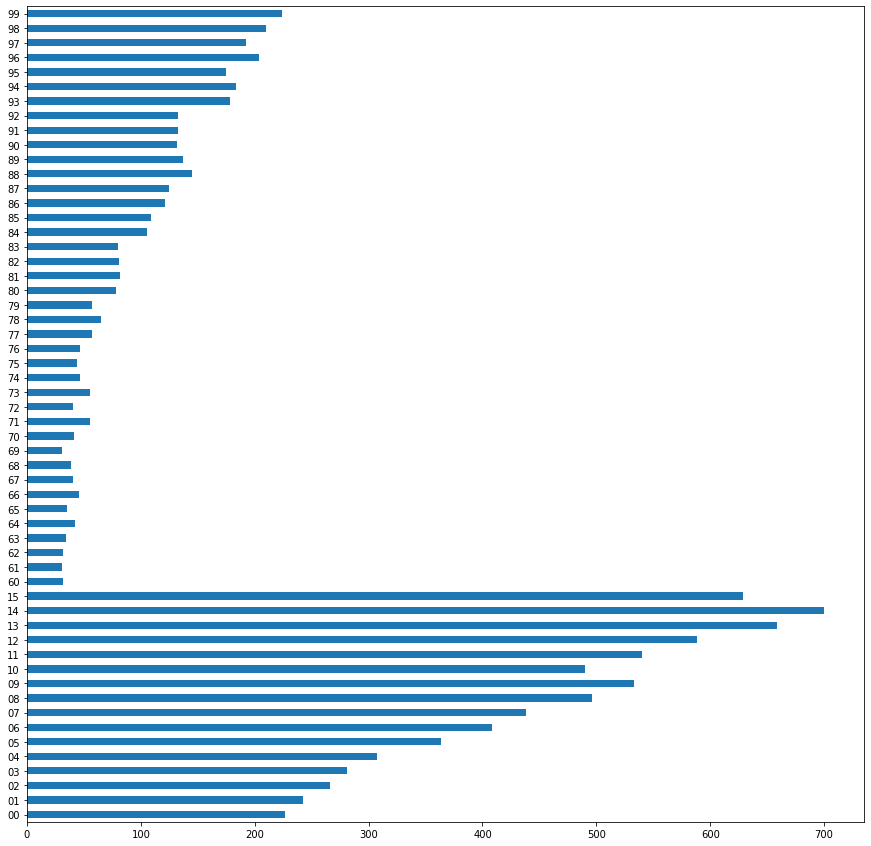

In [15]:
import matplotlib.pyplot as plt
movies.year.value_counts().sort_index().plot(kind='barh', figsize=(15,15))

In [16]:
data = movies[['original_title', 'cast', 'director', 'genres', 'keywords']]
data.head()

,original_title,cast,director,genres,keywords
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,monster|dna|tyrannosaurus rex|velociraptor|island
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,future|chase|post-apocalyptic|dystopia|australia
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,based on novel|revolution|dystopia|sequel|dyst...
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,android|spaceship|jedi|space opera|3d
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,car race|speed|revenge|suspense|car


In [17]:
data.isnull().sum()

original_title       0
cast                76
director            44
genres              23
keywords          1493
dtype: int64

In [18]:
data = data.fillna('')

In [21]:
data = data.reset_index()

In [22]:
data['genres'] = data['genres'].apply(lambda x: x.replace('|', ' '))

In [23]:
def sci_fi(genres):
  lst = []
  genres = genres.split("|")
  for genre in genres:
    if genre == "Science Fiction":
      lst.append("Sci-fi")
    else:
      lst.append(genre)
  return ' '.join(lst)

In [24]:
data['genres'] = data['genres'].apply(lambda x: sci_fi(x))

In [26]:
data['keywords'] = data['keywords'].apply(lambda x: x.replace('|', ' '))

In [27]:
data.head(2)

,index,original_title,cast,director,genres,keywords
0,0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action Adventure Science Fiction Thriller,monster dna tyrannosaurus rex velociraptor island
1,1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action Adventure Science Fiction Thriller,future chase post-apocalyptic dystopia australia


In [28]:
def get_actor1(actors):
  actors = actors.split('|')
  return actors[0]

def get_actor2(actors):
  actors = actors.split('|')
  if len(actors) > 1:
    return actors[1]
  else:
    return 'unknown'
  
def get_actor3(actors):
  actors = actors.split('|')
  if len(actors) > 2:
    return actors[2]
  else:
    return 'unknown'


In [29]:
data['actor_1'] = data['cast'].apply(lambda x: get_actor1(x))
data['actor_2'] = data['cast'].apply(lambda x: get_actor2(x))
data['actor_3'] = data['cast'].apply(lambda x: get_actor3(x))

In [30]:
data.head()

,index,original_title,cast,director,genres,keywords,actor_1,actor_2,actor_3
0,0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action Adventure Science Fiction Thriller,monster dna tyrannosaurus rex velociraptor island,Chris Pratt,Bryce Dallas Howard,Irrfan Khan
1,1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action Adventure Science Fiction Thriller,future chase post-apocalyptic dystopia australia,Tom Hardy,Charlize Theron,Hugh Keays-Byrne
2,2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure Science Fiction Thriller,based on novel revolution dystopia sequel dyst...,Shailene Woodley,Theo James,Kate Winslet
3,3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action Adventure Science Fiction Fantasy,android spaceship jedi space opera 3d,Harrison Ford,Mark Hamill,Carrie Fisher
4,4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action Crime Thriller,car race speed revenge suspense car,Vin Diesel,Paul Walker,Jason Statham


In [31]:
data['comb'] = data['director'] + ' ' + data['actor_1'] + ' ' + data['actor_2'] + ' ' + data['actor_3'] + ' ' + data['genres']+ ' ' + data['keywords']

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(data['comb'])

In [34]:
cosine_sim = cosine_similarity(count_matrix)

In [35]:
cosine_sim

array([[1.        , 0.25      , 0.2       , ..., 0.        , 0.06741999,
        0.        ],
       [0.25      , 1.        , 0.3       , ..., 0.        , 0.06741999,
        0.05270463],
       [0.2       , 0.3       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.07537784,
        0.        ],
       [0.06741999, 0.06741999, 0.        , ..., 0.07537784, 1.        ,
        0.        ],
       [0.        , 0.05270463, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [36]:
count_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
def get_index_from_title(title):
  return data[data['original_title'] == title]['index'].values[0]

def get_title_from_index(index):
  return data[data['index'] == index]['original_title'].values[0]

In [38]:
index = get_index_from_title('Avatar')
movie = get_title_from_index(index)

In [39]:
similar_movies = list(enumerate(cosine_sim[index]))

In [40]:
similar_movies = sorted(similar_movies, key=lambda x : x[1], reverse=True)[1:11]
similar_movies

[(630, 0.4681910919173118),
 (2592, 0.4334607234315054),
 (10472, 0.41962716370814124),
 (5435, 0.4170288281141495),
 (7309, 0.40009880202694836),
 (7825, 0.39130434782608703),
 (2691, 0.3640126041546321),
 (8062, 0.35400521619692155),
 (3, 0.3440312310280934),
 (7829, 0.3405026123034995)]

In [41]:
recommended_movies = []
for movie in similar_movies:
  recommended_movies.append(get_title_from_index(movie[0]))

recommended_movies

['Guardians of the Galaxy',
 'Babylon 5: A Call to Arms',
 'Aliens',
 'Star Trek Into Darkness',
 'The Empire Strikes Back',
 'Alien',
 'Jason X',
 'Metalstorm: The Destruction of Jared-Syn',
 'Star Wars: The Force Awakens',
 'Moonraker']